In [59]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    BatchNormalization,
)


In [60]:
# Pre-processing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Memuat data pelatihan dan validasi dalam batch
train_data = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224), # ukuran gambar yang diharapkan
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [61]:
# Pre-processing data
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data = test_datagen.flow_from_directory(
    'test',
    target_size=(224, 224), #ukuran gambar yang diharapkan
    batch_size=32,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


In [83]:
# Membangun model sequential
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kedua
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi ketiga
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi keempat
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kelima
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Mengubah hasil konvolusi menjadi vektor
model.add(Flatten())

# Fully connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))


In [63]:

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [64]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_29 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [65]:
hist = model.fit(
    train_data,
    epochs=10,
    verbose=1,
    steps_per_epoch=5,
    validation_steps=10,
    validation_data=test_data,
)

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 3.8271 - accuracy: 0.5405WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10 batches). You may need to use the repeat() function when building your dataset.


5/5 [==============================] - 56s 11s/step - loss: 3.8271 - accuracy: 0.5405 - val_loss: 0.7032 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 51s 10s/step - loss: 0.7030 - accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 52s 10s/step - loss: 0.6927 - accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 56s 11s/step - loss: 0.6987 - accuracy: 0.4437
Epoch 5/10
5/5 [==============================] - 56s 11s/step - loss: 0.6943 - accuracy: 0.5312
Epoch 6/10
5/5 [==============================] - 56s 11s/step - loss: 0.6939 - accuracy: 0.5188
Epoch 7/10
5/5 [==============================] - 57s 11s/step - loss: 0.6958 - accuracy: 0.4375
Epoch 8/10
5/5 [==============================] - 56s 11s/step - loss: 0.6934 - accuracy: 0.4938
Epoch 9/10
5/5 [==============================] - 56s 11s/step - loss: 0.6931 - accuracy: 0.5188
Epoch 10/10
5/5 [==============================] - 56s 11s/step - loss: 0.6948 - accuracy: 0.481

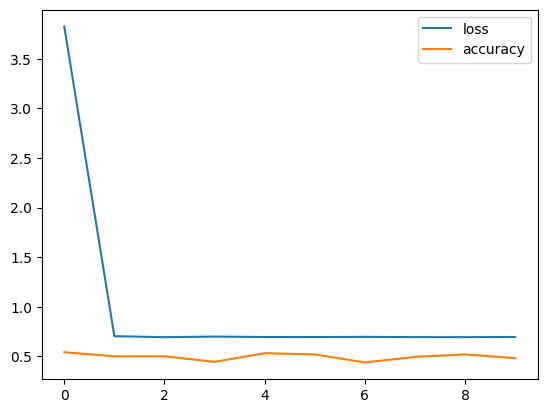

<Figure size 640x480 with 0 Axes>

In [79]:
# Visualisasi Loss dan Akurasi
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
plt.savefig('Loss_Acc')

In [80]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [81]:
class_name = list(train_data.class_indices.keys())
class_name

['bike', 'car']

1/1 [==============================] - 0s 107ms/step


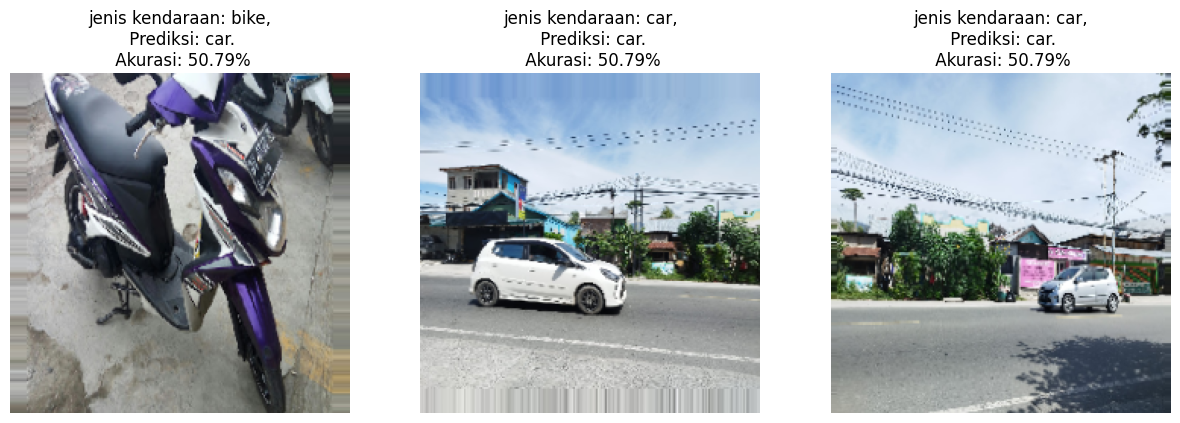

In [82]:
#Menampilkan gambar dan prediksi
import numpy as np

plt.figure(figsize=(15, 15))

for images, labels in test_data:
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"jenis kendaraan: {actual_class},\n Prediksi: {predicted_class}.\n Akurasi: {confidence}%")
        plt.axis("off")
    break